In [85]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
layer_names = []
block_l_names = ["conv0", "conv1", "shortcut"]
num_layers=27
for l in range(num_layers):
    if l%3 ==2:
        if l//3 == 3 or l//3==6:
            layer_names.append(f"Block_{l//3}_{block_l_names[l%3]}")
    else:
        layer_names.append(f"Block_{l//3}_{block_l_names[l%3]}")
api = wandb.Api()
project= "QSLayerRetrain"
# Project is specified by <entity/project-name>
result_list = []
config_list = []
runs = api.runs(f"alelab/{project}")
duals = {1: {'worst': 0.019861960783600807, 'best': 0.06931800643603007}, 2: {'worst': 0.042590967689951256, 'best': 0.1297377571463585}, 4: {'worst': 0.09579822855691116, 'best': 0.24043085674444836}, 8: {'worst': 0.21675833376745382, 'best': 0.42848291248083115}}
slacks = {1: {'worst': 0.006625153265279476, 'best': 0.06610378920954686}, 2: {'worst': 0.00863039473037546, 'best': 0.10022505090755444}, 4: {'worst': 0.013686025366644134, 'best': 0.1756794861789103}, 8: {'worst': 0.03461469201980831, 'best': 0.310676863863402}}
for run in runs:
    if run.state=="finished": 
        config = {}
        config["bit_width_list"] = list(map(int, run.config["bit_width_list"].split(',')))
        config["bit_width"] = config["bit_width_list"][0]
        config["seed"] = run.config["seed"]
        config["ranking"] = run.name.split("_")[1][:-1]
        if config["ranking"] in ["best", "worst"]:
            config["num_fp"] = run.name.split("_")[0][:-1]
            if config["num_fp"]  != "16":
                #config["epsilonlw"] = run.config["epsilonlw"]
                #train = run.history(keys=[f'train_acc_{config["bit_width"]}'], x_axis="epoch")
                train_acc = run.summary._json_dict[f'train_acc_{config["bit_width"]}']
                test_acc = run.summary._json_dict[f'test_acc_{config["bit_width"]}']
                train_loss = run.summary._json_dict[f'train_loss_{config["bit_width"]}']
                test_loss = run.summary._json_dict[f'test_loss_{config["bit_width"]}']
                dual = duals[int(config["num_fp"])][config["ranking"]]
                slack = slacks[int(config["num_fp"])][config["ranking"]]
                #val = run.history(keys=[f'val_acc_{config["bit_width"]}'], x_axis="epoch")
                #test = run.history(keys=[f'test_acc_{config["bit_width"]}'], x_axis="epoch")
                print(dual)
                accuracy = {"train":train_acc, "test":test_acc}
                loss = {"train":train_loss, "test":test_loss}
                for split in ["train", "test"]:
                    result_dict = {"accuracy":accuracy[split], "split": split, "dual": dual, "slack":slack, "loss":loss[split]}
                    result_list.append(result_dict)
                    config_list.append(config)

project= "QS_Ours_OnlyCE"
runs = api.runs(f"alelab/{project}")
epsilon_ce = {2:0.7, 1:0.9}
for run in runs:
    if False:#run.state=="finished": 
        config = {}
        config["bit_width_list"] = list(map(int, run.config["bit_width_list"].split(',')))
        config["bit_width"] = config["bit_width_list"][0]
        if config["bit_width_list"][0] in [1, 2, "1", "2"]:
            if run.config["epsilon_out"] == epsilon_ce[config["bit_width"]]:
                config["seed"] = run.config["seed"]
                config["ranking"] = "best"#run.name.split("_")[1][:-1]
                config["num_fp"] = "0"
                #config["epsilonlw"] = run.config["epsilonlw"]
                #train = run.history(keys=[f'train_acc_{config["bit_width"]}'], x_axis="epoch")
                try:
                    train_acc = run.summary._json_dict[f'train_acc_{config["bit_width"]}']
                    test_acc = run.summary._json_dict[f'test_acc_{config["bit_width"]}']
                    #val = run.history(keys=[f'val_acc_{config["bit_width"]}'], x_axis="epoch")
                    #test = run.history(keys=[f'test_acc_{config["bit_width"]}'], x_axis="epoch")
                    accuracy = {"train":train_acc, "test":test_acc}
                    for split in ["train", "test"]:
                        result_dict = {"accuracy":accuracy[split], "split": split, "dual": 0, "slack":0}
                        result_list.append(result_dict)
                        config_list.append(config)
                except:
                    print(run.name, "failed")
config_df = pd.DataFrame.from_records(config_list) 
result_df = pd.DataFrame.from_records(result_list) 
all_df = pd.concat([config_df,result_df], axis=1)

0.42848291248083115
0.42848291248083115
0.42848291248083115
0.042590967689951256
0.042590967689951256
0.019861960783600807
0.019861960783600807
0.1297377571463585
0.1297377571463585
0.21675833376745382
0.06931800643603007
0.06931800643603007
0.42848291248083115
0.21675833376745382
0.042590967689951256
0.042590967689951256
0.019861960783600807
0.21675833376745382
0.019861960783600807
0.1297377571463585
0.1297377571463585
0.06931800643603007
0.42848291248083115
0.06931800643603007
0.21675833376745382
0.21675833376745382
0.42848291248083115
0.042590967689951256
0.1297377571463585
0.1297377571463585
0.06931800643603007
0.06931800643603007
0.019861960783600807
0.019861960783600807
0.21675833376745382
0.042590967689951256
0.24043085674444836
0.24043085674444836
0.09579822855691116
0.09579822855691116
0.24043085674444836
0.09579822855691116
0.24043085674444836
0.09579822855691116
0.09579822855691116
0.24043085674444836
0.09579822855691116
0.24043085674444836


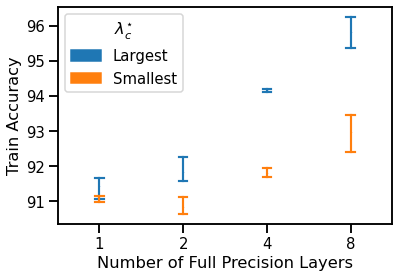

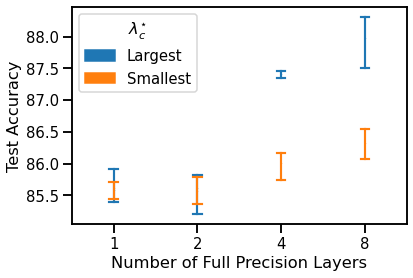

In [91]:
import seaborn
import matplotlib as mpl
import matplotlib.patches as mpatches
sns.set_context("talk", font_scale=0.9)
mpl.rcParams['lines.linewidth'] = 1.2
for bw in [1]:
    for i, split in enumerate(["train", "test"]):
        query_df = all_df.query(f'bit_width=={bw} and split=="{split}"')
        query_df =  query_df[query_df["ranking"].isin(["best", "worst"])]
        query_df = query_df.sort_values("num_fp")
        query_df = query_df.replace({"best": "Largest", "worst": "Smallest"})
        axs = seaborn.pointplot(data=query_df, x="num_fp", y="accuracy", hue="ranking",join=False,errorbar="sd", marker=".", capsize=.1, scale=0.2)
        color_patches = [mpatches.Patch(color=c, alpha=1) for c in ("tab:blue", "tab:orange")]
        legend = axs.legend(color_patches, ["Largest", "Smallest"], title="$\lambda^{\star}_c$")#, bbox_to_anchor=(1.1, 0.8))#, loc=2, borderaxespad=0.)
        plt.xlabel("Number of Full Precision Layers")
        plt.ylabel(split.capitalize()+ " Accuracy")
        plt.savefig(f"{split}_accuracy_Bitwidth_{bw}.pdf", bbox_inches='tight')
        plt.show()

In [28]:
from statistics import NormalDist

def confidence_interval(data, confidence=0.95, std=True):
  if std:
    return np.std(data)
  else:
    dist = NormalDist.from_samples(data)
    z = NormalDist().inv_cdf((1 + confidence) / 2.)
    h = dist.stdev * z / ((len(data) - 1) ** .5)
    return h

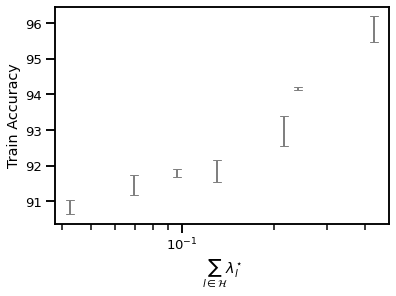

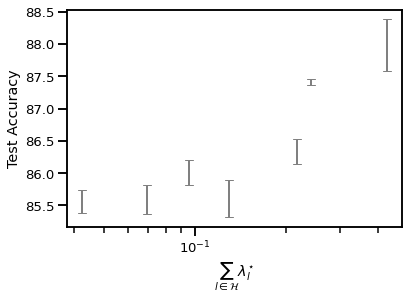

In [90]:
import seaborn
import matplotlib as mpl
import matplotlib.patches as mpatches
sns.set_context("talk", font_scale=0.8)
mpl.rcParams['lines.linewidth'] = 1.8
for bw in [1]:
    for i, split in enumerate(["train", "test"]):
        query_df = all_df.query(f'bit_width=={bw} and split=="{split}"')
        #print(query_df["dual"])
        query_df =  query_df[query_df["ranking"].isin(["best", "worst"])]
        query_df = query_df[query_df["dual"]>2e-2]
        query_df = query_df.sort_values("dual")
        query_df = query_df.replace({"best": "Largest", "worst": "Smallest"})
        x = query_df["dual"].to_numpy()
        y = []
        yerr = []
        for d in x:
            y.append(query_df[query_df["dual"]==d]["accuracy"].to_numpy().mean())
            yerr.append(confidence_interval(query_df[query_df["dual"]==d]["accuracy"].to_numpy()))
        
        #axs = seaborn.lineplot(data=, x="dual", y="accuracy")
        plt.errorbar(x, y, yerr=yerr, fmt="none", capsize=4, ecolor='0.5')
        #legend = axs.legend(color_patches, ["Largest", "Smallest"], title="$\lambda^{\star}_c$",bbox_to_anchor=(1.0, 1.0))#, bbox_to_anchor=(1.1, 0.8), loc=2, borderaxespad=0.)
        plt.xlabel("$\sum_{l \in \mathcal{H}} \lambda^{\star}_l$")
        plt.semilogx()
        plt.ylabel(split.capitalize()+ " Accuracy")
        plt.savefig(f"Sum_of_duals_{split}.pdf", bbox_inches='tight', dpi=300)
        plt.show()

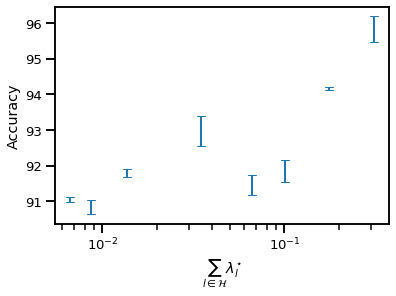

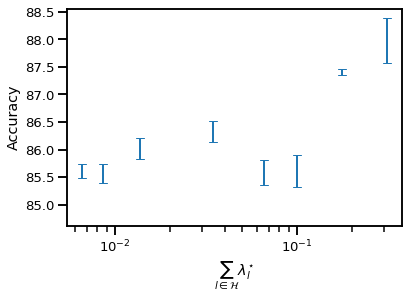

In [48]:
import seaborn
import matplotlib as mpl
import matplotlib.patches as mpatches
sns.set_context("talk", font_scale=0.8)
mpl.rcParams['lines.linewidth'] = 1.8
for bw in [1]:
    for i, split in enumerate(["train", "test"]):
        query_df = all_df.query(f'bit_width=={bw} and split=="{split}"')
        #print(query_df["dual"])
        query_df =  query_df[query_df["ranking"].isin(["best", "worst"])]
        query_df = query_df.sort_values("dual")
        query_df = query_df.replace({"best": "Largest", "worst": "Smallest"})
        x = query_df["slack"].to_numpy()
        y = []
        yerr = []
        for d in x:
            y.append(query_df[query_df["slack"]==d]["accuracy"].to_numpy().mean())
            yerr.append(confidence_interval(query_df[query_df["slack"]==d]["accuracy"].to_numpy()))
        
        #axs = seaborn.lineplot(data=, x="dual", y="accuracy")
        plt.errorbar(x, y, yerr=yerr, fmt="none", capsize=4)
        color_patches = [mpatches.Patch(color=c, alpha=1) for c in ("tab:blue", "tab:orange")]
        #legend = axs.legend(color_patches, ["Largest", "Smallest"], title="$\lambda^{\star}_c$",bbox_to_anchor=(1.0, 1.0))#, bbox_to_anchor=(1.1, 0.8), loc=2, borderaxespad=0.)
        plt.xlabel("$\sum_{l \in \mathcal{H}} \lambda^{\star}_l$")
        plt.semilogx()
        plt.ylabel("Accuracy")
        plt.savefig(f"{split}_accuracy_Bitwidth_{bw}_steps.pdf", bbox_inches='tight')
        plt.show()

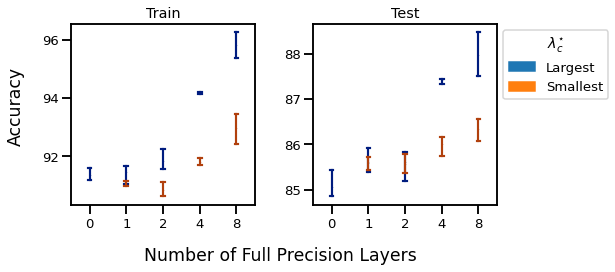

In [59]:
import seaborn
import matplotlib as mpl
import matplotlib.patches as mpatches
sns.set_context("talk", font_scale=0.8)
mpl.rcParams['lines.linewidth'] = 1.2
for bw in [1]:
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    for i, split in enumerate(["train", "test"]):
        query_df = all_df.query(f'bit_width=={bw} and split=="{split}"')
        query_df =  query_df[query_df["ranking"].isin(["best", "worst"])]
        query_df = query_df.sort_values("num_fp")
        query_df = query_df.replace({"best": "Largest", "worst": "Smallest"})
        seaborn.pointplot(ax = axs[i], data=query_df, x="num_fp", y="accuracy", hue="ranking",join=False, marker=".", capsize=.1, scale=0.2)
        color_patches = [mpatches.Patch(color=c, alpha=1) for c in ("tab:blue", "tab:orange")]
        axs[i].set_xlabel("")
        axs[i].set_ylabel("")
        axs[i].set_title(split.capitalize())
        axs[i].get_legend().remove()
    legend = axs[1].legend(color_patches, ["Largest", "Smallest"], title="$\lambda^{\star}_c$",bbox_to_anchor=(1.0, 1.0))#, bbox_to_anchor=(1.1, 0.8), loc=2, borderaxespad=0.)
    fig.supxlabel("Number of Full Precision Layers", x=0.4,y = 0.05)
    fig.supylabel("Accuracy", y = 0.6)
    fig.tight_layout(w_pad=2)
    fig.subplots_adjust(right=0.7)

    plt.savefig(f"Accuracy_Bitwidth_{bw}_steps.pdf", bbox_inches='tight')
    plt.show()

In [60]:
import seaborn
import matplotlib as mpl
import matplotlib.patches as mpatches
sns.set_context("talk", font_scale=0.8)
mpl.rcParams['lines.linewidth'] = 1.2
for bw in [1, 2]:
    for split in ["train", "test"]:
        query_df = all_df.query(f'bit_width=={bw} and split=="{split}"')
        query_df =  query_df[query_df["ranking"].isin(["best", "worst"])]
        query_df = query_df.sort_values("num_fp")
        query_df = query_df.replace({"best": "Largest", "worst": "Smallest"})
        ax = seaborn.pointplot(data=query_df, x="num_fp", y="accuracy", hue="ranking",join=False, marker=".", capsize=.1, scale=0.2)
        color_patches = [mpatches.Patch(color=c, alpha=1) for c in ("tab:blue", "tab:orange")]
        legend = ax.legend(color_patches, ["Largest", "Smallest"], title="$\lambda^{\star}_c$")#, bbox_to_anchor=(1.1, 0.8), loc=2, borderaxespad=0.)
        plt.xlabel("Number of Full Precision Layers")
        plt.ylabel("Accuracy")
        plt.savefig(f"{split}_accuracy_Bitwidth_{bw}_steps.pdf", bbox_inches='tight')
        plt.show()

In [ ]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
layer_names = []
block_l_names = ["conv0", "conv1", "shortcut"]
num_layers=27
for l in range(num_layers):
    if l%3 ==2:
        if l//3 == 3 or l//3==6:
            layer_names.append(f"Block_{l//3}_{block_l_names[l%3]}")
    else:
        layer_names.append(f"Block_{l//3}_{block_l_names[l%3]}")
api = wandb.Api()
project= "QSLayerRetrain"
# Project is specified by <entity/project-name>
result_list = []
config_list = []
runs = api.runs(f"alelab/{project}")
for run in runs:
    if run.state=="finished": 
        config = {}
        config["bit_width_list"] = list(map(int, run.config["bit_width_list"].split(',')))
        config["bit_width"] = config["bit_width_list"][0]
        config["seed"] = run.config["seed"]
        config["ranking"] = run.name.split("_")[1][:-1]
        config["num_fp"] = run.name[0]
        #config["epsilonlw"] = run.config["epsilonlw"]
        #train = run.history(keys=[f'train_acc_{config["bit_width"]}'], x_axis="epoch")
        train_acc = run.summary._json_dict[f'train_acc_{config["bit_width"]}']
        test_acc = run.summary._json_dict[f'test_acc_{config["bit_width"]}']
        #val = run.history(keys=[f'val_acc_{config["bit_width"]}'], x_axis="epoch")
        #test = run.history(keys=[f'test_acc_{config["bit_width"]}'], x_axis="epoch")
        accuracy = {"train":train_acc, "test":test_acc}
        for split in ["train", "test"]:
            result_dict = {"accuracy":accuracy[split], "split": split}
            result_list.append(result_dict)
            config_list.append(config)
project= "QS_Ours_OnlyCE"
runs = api.runs(f"alelab/{project}")
epsilon_ce = {2:0.7, 1:0.9}
for run in runs:
    if True:#run.state=="finished": 
        config = {}
        config["bit_width_list"] = list(map(int, run.config["bit_width_list"].split(',')))
        config["bit_width"] = config["bit_width_list"][0]
        if config["bit_width_list"][0] in [1, 2]:
            print(config["bit_width"])
            print(epsilon_ce[config["bit_width"]])
            if run.config["epsilon_out"] == epsilon_ce[config["bit_width"]]:
                config["seed"] = run.config["seed"]
                config["ranking"] = run.name.split("_")[1][:-1]
                config["num_fp"] = 0
                #config["epsilonlw"] = run.config["epsilonlw"]
                #train = run.history(keys=[f'train_acc_{config["bit_width"]}'], x_axis="epoch")
                try:
                    train_acc = run.summary._json_dict[f'train_acc_{config["bit_width"]}']
                    test_acc = run.summary._json_dict[f'test_acc_{config["bit_width"]}']
                    #val = run.history(keys=[f'val_acc_{config["bit_width"]}'], x_axis="epoch")
                    #test = run.history(keys=[f'test_acc_{config["bit_width"]}'], x_axis="epoch")
                    accuracy = {"train":train_acc, "test":test_acc}
                    for split in ["train", "test"]:
                        result_dict = {"accuracy":accuracy[split], "split": split}
                        result_list.append(result_dict)
                        config_list.append(config)
                except:
                    pass

config_df = pd.DataFrame.from_records(config_list) 
result_df = pd.DataFrame.from_records(result_list) 
all_df = pd.concat([config_df,result_df], axis=1)

2
0.7
1
0.9
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
1
0.9
2
0.7
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
1
0.9
2
0.7
